In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
from matrix_neural_net import Network
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

class TqdmUpdate(tqdm):
     def update_to(self, b=1, bsize=1, tsize=None):
        """
        b  : int, optional
            Number of blocks transferred so far [default: 1].
        bsize  : int, optional
            Size of each block (in tqdm units) [default: 1].
        tsize  : int, optional
            Total size (in tqdm units). If [default: None] remains unchanged.
        """
        if tsize is not None:
            self.total = tsize
        
        self.update(b * bsize - self.n)  # will also set self.n = b * bsize

In [2]:
# load images and labels of the MNIST data set 
# each element in x_train/x_test is a handwritten digit
# and each element in y_train/y_test is the associated 
# label for that digit (0-9)
if not os.path.exists('./data/mnist/X.npy'):
    import mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    X = np.append(x_train, x_test)
    y = np.append(y_train, y_test)
    np.save('./data/mnist/X', X)
    np.save('./data/mnist/y', y)

X = np.load('./data/mnist/X.npy')
X = X.reshape(70000, 28, 28)
# divide by 255 to normalize values
X = np.array([ (x.flatten())/255 for x in X])

y = np.load('./data/mnist/y.npy')
y = y.reshape(70000, )
y = np.array([int(i) for i in y])

# One hot encode the y data (target variable)
temp = np.zeros((y.size, int(y.max())+1))
temp[np.arange(y.size),y] = 1
y = temp

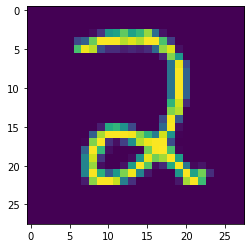

In [3]:
# example of one of the handwritten digits
plt.imshow(X[432].reshape((28,28)))

In [4]:
np.argmax(y[432])

2

In [5]:
# each image is 28x28 pixels, which is flattened
# out into an input array of length 784
len(X[0])

784

In [6]:
# instatiate network with sigmoid activation
# this shape returns an ~80% testing accuracy 
# and takes about 4m30s to train on the MNIST 
# dataset (60,000 images) on an intel pentium, 
# 8Gb memory
network = Network(
    shape=[784, 200, 80, 10], 
    activation = 'sigmoid', output_activation='sigmoid',
    learning_rate= 0.5
)

In [7]:
# verify that the forwad pass works and provides an 
# output with a probability for each label
guess = network.forward_pass(X[0])
guess

array([0.96642771, 0.69700636, 0.8229515 , 0.04989764, 0.14217617,
       0.96098167, 0.55232396, 0.98196917, 0.36432889, 0.82152129])

In [8]:
# the position of the highest probability is taken
# to be the network's output
interpret = lambda x: np.argmax(x)
interpret(guess)

7

In [9]:
# verify that the backwards pass works
network.backward_pass(
    network_input = X[0],
    network_output = guess, 
    expected_output = y[0]
)

In [11]:
# training the network: 
# the training and testing sets are split up into 100 epochs 
# each epoch executes 600 training passes (forward and backwards)
# propagation, followed by 100 testing passes to determine the 
# accuracy. The cost function is (y_expected - y_output)**2

with TqdmUpdate() as t: 
    network.learning_rate = 0.5
    training_accuracy, testing_accuracy = network.train_test(X, y, test_split=0.2, progress=t.update_to)
    print ("Train acc: %.4f - Test acc: %.4f" %(training_accuracy, testing_accuracy))
 

100%|█████████▉| 13999/14000 [10:03<00:00, 23.19it/s] 

Train acc: 0.9129 - Test acc: 0.9474


In [87]:
training_accuracy, testing_accuracy = network.train_test(X[0:2000], y[0:2000], test_split=0.2)
print ("Train acc: %.4f - Test acc: %.4f" %(training_accuracy, testing_accuracy))
network.learning_rate = 0.5
# training_accuracies, testing_accuracies = network.train_test_minibatch(
#     X[0:50], y[0:50], test_split=0.2, batch_size=10, epochs=60)
# plt.plot(training_accuracies, label="Training")
# plt.plot(testing_accuracies, label="Testing")
# plt.legend()
# plt.show()

Output:  [1.32961825e-02 2.40391591e-02 4.42750331e-02 6.74051194e-03
 3.84656456e-04 1.47234837e-01 1.58841073e-02 3.26927575e-03
 2.69689288e-02 5.15652228e-01]
Output:  [0.64252082 0.00222255 0.17664457 0.00397064 0.00324184 0.04041403
 0.01194562 0.00367589 0.00193695 0.79357452]
Output:  [9.55987284e-01 4.58052398e-03 9.50854929e-02 9.33496441e-03
 8.84528285e-04 3.66375486e-02 1.40070000e-02 1.82124205e-02
 8.41797441e-04 7.02885166e-02]
Output:  [0.1396993  0.01792439 0.1042127  0.00114752 0.014742   0.12611443
 0.0071095  0.01472958 0.768035   0.26076363]
Output:  [0.10142953 0.00787637 0.02455237 0.00359642 0.03947423 0.01592216
 0.02417839 0.00851747 0.00911951 0.59146006]
Output:  [0.94872457 0.00113857 0.03413067 0.00630127 0.00513031 0.05597082
 0.03338525 0.0122348  0.00213589 0.00350236]
Output:  [0.05773876 0.01224422 0.14114561 0.00053141 0.00711998 0.12533912
 0.02571224 0.00113363 0.3804832  0.00072633]
Output:  [0.03776739 0.01263965 0.0196535  0.73102009 0.00322155

Output:  [8.72364392e-03 5.99166070e-01 1.93808486e-01 8.29516252e-02
 5.35118817e-04 3.66029483e-02 1.96172260e-02 1.99796507e-01
 8.63648216e-03 2.34720046e-03]
Output:  [3.88625786e-01 6.01456267e-03 3.13874004e-01 9.90934602e-03
 2.11873374e-04 6.25185005e-02 4.04357794e-03 1.69639314e-01
 1.20881164e-03 4.31973760e-03]
Output:  [3.93634120e-02 1.47328607e-02 9.46267564e-02 5.13372084e-03
 5.80695711e-04 9.06406425e-02 1.93569309e-02 1.85748677e-02
 6.85062583e-01 5.21501726e-03]
Output:  [3.20333117e-01 6.75878901e-03 1.27844563e-01 2.01987200e-03
 1.84731860e-04 2.12029285e-03 3.54220959e-01 2.84061057e-02
 6.25927619e-04 4.54747360e-03]
Output:  [4.75293609e-02 3.83457445e-02 4.17053032e-01 1.95697054e-03
 2.48197863e-04 2.53715830e-02 5.20962796e-01 5.78962821e-02
 3.12385554e-03 1.84826084e-03]
Output:  [5.31054699e-03 7.61967705e-03 7.82976711e-01 5.26100074e-01
 7.07174933e-04 4.84898721e-02 5.87146719e-03 1.31772793e-02
 5.50137765e-02 2.49407547e-02]
Output:  [1.19701188e-

Output:  [0.015837   0.04089382 0.11289566 0.29635858 0.00042775 0.00211681
 0.16865579 0.06187385 0.02146649 0.00060058]
Output:  [0.12160553 0.00473329 0.02576195 0.00100225 0.00250387 0.02056613
 0.46054139 0.00295681 0.06254528 0.0006791 ]
Output:  [7.13649025e-04 9.60226834e-01 3.02785007e-03 3.63487197e-04
 4.11606873e-04 8.50458606e-03 5.41406329e-03 3.23899576e-03
 5.21446835e-03 2.21465073e-04]
Output:  [2.16322753e-02 4.47877895e-03 3.73763790e-02 6.37304318e-04
 2.06624714e-04 2.91136453e-04 7.94474611e-01 7.99475887e-03
 3.16766263e-04 7.54490550e-04]
Output:  [3.83547342e-04 5.43399568e-01 5.74831339e-02 2.21068331e-04
 2.88078177e-04 7.53309533e-03 2.16498041e-02 1.13506885e-02
 1.32924486e-02 5.01030615e-05]
Output:  [2.12832628e-02 7.02662532e-01 2.74705988e-01 6.08359138e-03
 1.66263471e-03 7.62407089e-03 4.40263375e-02 6.06549523e-03
 4.57231978e-04 7.64571965e-05]
Output:  [4.19515109e-02 4.71895532e-03 3.13406434e-01 1.88377131e-03
 2.35738579e-04 2.04396919e-03 1.9

 1.51969291e-02 7.64023200e-04]
Output:  [1.63908197e-02 3.04846611e-02 1.62142672e-01 8.49168672e-01
 6.74235308e-04 4.00670851e-02 1.80135087e-03 1.14267280e-02
 3.29143451e-03 1.27151776e-04]
Output:  [5.42788357e-01 1.95244232e-04 3.65090085e-02 1.85196466e-02
 3.06138356e-03 6.32379556e-02 2.29998731e-03 1.07193899e-01
 1.16265597e-02 3.36627055e-03]
Output:  [9.94288624e-01 1.94350928e-04 4.00473002e-02 1.82800373e-03
 9.30583624e-04 9.35582498e-03 5.89387498e-02 2.67961675e-02
 1.63899157e-03 1.39908361e-04]
Output:  [0.25577394 0.00530338 0.00521461 0.04251742 0.00983866 0.01556421
 0.00232388 0.0192532  0.02931383 0.00042286]
Output:  [5.51361048e-01 2.14123989e-03 1.92111941e-02 5.65986220e-03
 8.09423128e-04 4.44470517e-03 6.57259599e-02 2.37912692e-02
 1.51476755e-03 2.17920786e-04]
Output:  [9.46153159e-01 2.77925131e-03 8.36133690e-02 5.71405729e-03
 5.63489577e-04 9.52682345e-04 7.00968801e-02 1.13479369e-02
 1.16074969e-02 1.61865405e-04]
Output:  [9.87093096e-01 2.3257

Output:  [0.00088499 0.01155035 0.00236578 0.02681857 0.21747936 0.01535474
 0.00554669 0.05946066 0.00442449 0.02118495]
Output:  [2.72259765e-03 3.33189271e-03 9.54965955e-04 2.91783376e-05
 1.49874179e-01 2.07743062e-03 2.80531962e-01 3.63113524e-01
 2.40430059e-02 6.79320945e-02]
Output:  [7.57590904e-04 7.59631462e-03 8.26802130e-05 1.10628339e-03
 2.14529029e-02 2.49443977e-03 5.04635605e-03 6.18782299e-01
 2.95858863e-02 2.77767846e-01]
Output:  [0.01834722 0.00093378 0.00080413 0.02247239 0.08314514 0.01955869
 0.00425608 0.00605411 0.00270662 0.77453028]
Output:  [4.79960037e-03 5.43689802e-02 1.85176629e-02 7.53873994e-04
 4.99529716e-03 5.34585429e-04 6.45205635e-01 6.84830655e-04
 1.43188116e-03 5.79645162e-03]
Output:  [4.41855994e-02 2.67649848e-02 8.72522573e-03 1.90920403e-04
 7.77706080e-04 4.80778892e-04 9.77729597e-01 1.56886585e-03
 8.56009296e-03 4.38264671e-03]
Output:  [4.24829784e-03 2.86324100e-02 2.05831626e-02 1.59879090e-04
 3.13151297e-01 5.72115812e-03 7.9

Output:  [4.79787490e-04 9.63856389e-01 3.48231768e-04 6.71733965e-03
 5.85890861e-04 8.66398371e-03 3.76737648e-03 9.99614499e-03
 9.62027507e-02 2.35328508e-03]
Output:  [0.00370021 0.02776768 0.16067906 0.00504871 0.00191164 0.08329127
 0.00720194 0.00415681 0.22354695 0.00800441]
Output:  [4.45447780e-04 5.25819225e-02 1.91532644e-03 1.12418834e-02
 1.66823058e-03 3.89568681e-02 1.23402031e-04 6.54626013e-01
 2.25252529e-01 8.08448522e-03]
Output:  [0.03492372 0.00277691 0.06361509 0.00531891 0.00143363 0.00159186
 0.47273275 0.01035765 0.01118329 0.00362056]
Output:  [1.03551757e-04 8.51199935e-01 9.48007725e-04 1.36816006e-03
 6.16838873e-04 2.27797478e-03 2.61716443e-01 4.37297663e-02
 8.04010502e-01 1.37177443e-02]
Output:  [3.99592857e-06 1.78805563e-01 3.57511091e-04 1.51150539e-01
 7.87417874e-03 4.05199503e-03 2.04400750e-02 9.05248579e-02
 6.18183872e-02 1.14613291e-01]
Output:  [1.94501389e-03 4.42582161e-02 7.72634565e-02 9.79045900e-01
 9.01135771e-04 3.34825567e-02 7.7

Output:  [1.01471473e-02 1.37240483e-03 2.63641347e-04 1.26392465e-05
 3.99515218e-02 1.08551063e-02 2.12304628e-02 3.53411144e-02
 8.27408326e-01 4.20171631e-01]
Output:  [2.49044817e-02 1.24776051e-03 1.28442283e-01 2.08902885e-05
 5.30432732e-02 6.18999760e-03 5.83278241e-02 6.26320683e-02
 6.81314852e-03 2.61972495e-03]
Output:  [0.09004628 0.00077683 0.00258086 0.00095166 0.01729928 0.08533887
 0.06751861 0.0360028  0.00357732 0.06615601]
Output:  [2.56793385e-02 4.47670670e-03 1.95869660e-03 5.95746343e-01
 4.25298987e-04 2.80156762e-01 2.50898043e-03 1.35386278e-02
 9.46591688e-03 1.34857346e-03]
Output:  [2.96420910e-02 7.42831029e-02 1.93018660e-02 9.49071211e-05
 1.36742321e-03 2.24798263e-02 7.56103718e-03 1.27569439e-01
 9.60270848e-01 2.47925351e-03]
Output:  [0.00047752 0.06836414 0.0176666  0.21679199 0.00055348 0.05181088
 0.13421393 0.00376593 0.00787427 0.00042699]
Output:  [2.97937754e-03 3.26841166e-02 3.09326932e-01 2.75622933e-02
 5.81977046e-04 2.39819010e-01 6.7

Output:  [0.00111649 0.00364044 0.00219783 0.015505   0.00074588 0.03432318
 0.07086033 0.00162483 0.00436217 0.00613106]
Output:  [0.00038683 0.00099531 0.03510491 0.00019392 0.08774347 0.00154197
 0.04762791 0.01509689 0.00721973 0.17146829]
Output:  [6.13366367e-04 1.68213715e-04 2.62373458e-01 4.75239155e-03
 8.08261942e-03 4.54097247e-04 9.49913509e-01 3.43316568e-04
 5.18690374e-04 7.68359775e-02]
Output:  [0.00030213 0.01031044 0.1330454  0.00141886 0.16853907 0.0830919
 0.00181322 0.00092713 0.29737216 0.06040486]
Output:  [0.01285917 0.00479516 0.15337514 0.00081442 0.00472313 0.02570036
 0.01055919 0.0009734  0.29289461 0.0360614 ]
Output:  [9.41920966e-01 1.54186391e-04 1.75941645e-01 1.68631555e-03
 2.64804868e-02 4.13387477e-03 2.73716097e-02 3.44056198e-03
 4.51228088e-02 1.07150172e-02]
Output:  [2.46218709e-05 2.93753174e-04 2.95391450e-04 3.74412447e-05
 1.74603503e-02 1.19408757e-03 5.21390119e-03 5.34237180e-02
 9.59354437e-02 9.92190622e-01]
Output:  [7.75577693e-01

Output:  [9.67747415e-03 9.06066356e-01 3.77215773e-02 2.58032595e-02
 3.34968534e-03 6.64476731e-03 1.38758515e-04 2.43419770e-03
 4.90074196e-02 1.88905448e-03]
Output:  [0.00286353 0.00777905 0.57196524 0.20105475 0.03741115 0.01136173
 0.00183526 0.02463888 0.00205165 0.00954232]
Output:  [0.25464626 0.00437729 0.34476715 0.96326929 0.02863666 0.14295981
 0.00123595 0.01156658 0.00713402 0.00124749]
Output:  [1.44475104e-02 4.58976981e-03 1.28593869e-03 1.46193950e-03
 8.46914257e-03 1.65690529e-02 4.68880570e-04 9.20972866e-01
 1.05871953e-03 2.60334058e-01]
Output:  [2.01939650e-01 2.32692223e-03 6.61619552e-02 1.90293459e-03
 4.91083949e-03 1.30751734e-04 8.17951420e-01 4.50695315e-04
 1.92483334e-04 2.17030429e-03]
Output:  [0.00234179 0.00162469 0.0005904  0.02754322 0.06790285 0.00077696
 0.01414392 0.05894955 0.00401287 0.36603726]
Output:  [3.54437016e-03 4.78827072e-03 1.36035711e-02 3.73393995e-03
 9.04763885e-01 3.34364791e-03 1.61913453e-03 6.53963819e-02
 6.66423236e-0

Output:  [6.46300556e-04 1.04903608e-04 1.67037579e-03 3.47053854e-02
 9.93194560e-01 1.12143218e-02 6.74737548e-03 1.20818995e-03
 5.62301920e-03 3.78855075e-01]
Output:  [7.63321377e-04 2.59771617e-04 4.19258490e-04 4.02538044e-02
 9.79710485e-01 1.17799859e-02 2.88931834e-03 1.38608285e-03
 3.18301553e-03 2.36162335e-01]
Output:  [3.95110373e-05 7.56274836e-03 1.00497662e-02 9.33630904e-03
 1.54667045e-01 2.38354255e-03 5.30618025e-01 5.05962468e-04
 4.64105690e-03 1.43420986e-03]
Output:  [0.01863371 0.00341681 0.00512608 0.12687966 0.02088283 0.00278584
 0.09623022 0.00317246 0.02253838 0.00038104]
Output:  [1.31006258e-03 2.59124131e-03 1.25100228e-03 6.63068491e-02
 1.44175320e-02 3.75839077e-03 3.91908097e-01 4.83825768e-04
 2.85721076e-03 1.03936165e-04]
Output:  [3.51571492e-05 2.26670753e-01 5.31123266e-03 9.48612025e-02
 5.69060638e-03 1.60159190e-03 1.09861071e-01 1.05726762e-03
 8.10591553e-02 3.79442449e-04]
Output:  [9.30924366e-05 3.53476806e-01 2.43774926e-03 4.989342

Output:  [0.00332032 0.00016831 0.00444308 0.00143448 0.12177374 0.00408479
 0.0834884  0.00302475 0.00416126 0.05495459]
Output:  [9.07486229e-04 1.95439335e-04 5.52710145e-02 3.17637030e-04
 2.27362785e-01 5.54857093e-04 1.69183547e-01 1.22886359e-03
 9.27778818e-03 2.19447613e-01]
Output:  [7.88782264e-05 5.11822801e-01 2.40690841e-02 4.02992360e-04
 4.29146820e-04 2.00856695e-03 3.42589786e-03 5.49157835e-04
 2.14440141e-01 1.38725080e-03]
Output:  [7.27812094e-04 4.74079994e-02 5.34579226e-02 3.12528902e-04
 9.78057098e-03 4.96325416e-04 9.66931775e-01 7.24474420e-05
 9.04794626e-03 4.32516881e-03]
Output:  [0.30963316 0.00468616 0.00076905 0.05548545 0.0037722  0.1912336
 0.00104317 0.00062845 0.04573016 0.00663036]
Output:  [8.31011276e-05 3.01882103e-03 1.86596339e-03 5.43507732e-04
 4.65604955e-03 1.13090905e-02 7.01064960e-02 1.02675476e-02
 1.88225617e-02 7.69855183e-01]
Output:  [2.88198739e-05 9.01363920e-01 2.67155864e-02 3.36785682e-04
 8.65959681e-04 1.49164505e-02 2.77

Output:  [8.85171568e-05 8.35860463e-01 2.64984782e-02 1.75670183e-02
 1.18054296e-02 4.43381709e-03 4.24489419e-03 2.74642689e-03
 2.80650280e-01 3.38440551e-04]
Output:  [1.46993874e-04 3.69667115e-03 1.47178638e-04 7.08595280e-04
 4.43443668e-03 9.18129973e-03 3.27235672e-02 3.14495451e-01
 6.03478100e-02 9.35123970e-01]
Output:  [7.13749360e-04 4.15222335e-04 1.10208841e-02 5.23086222e-03
 9.52673243e-01 3.89965371e-02 4.30950568e-03 1.53415105e-02
 3.00118990e-03 5.98903882e-02]
Output:  [4.17866412e-02 1.27889023e-02 6.23720308e-02 2.47979598e-01
 4.62931267e-03 1.39815395e-01 5.28095516e-02 2.96188279e-03
 1.10595591e-02 1.19488877e-05]
Output:  [1.72713404e-03 8.94152746e-03 9.09098339e-02 9.10338724e-01
 3.07624127e-03 1.72892782e-01 1.77210631e-02 3.74810708e-04
 4.26321545e-02 6.42830494e-05]
Output:  [1.69619796e-04 1.56394717e-03 4.83025510e-03 1.32333317e-03
 6.59759738e-01 1.02126380e-02 5.22874923e-02 6.39951413e-03
 1.16293895e-02 4.04109730e-01]
Output:  [0.02287141 0

Output:  [5.34843673e-04 1.67903845e-03 1.09381905e-01 2.95190412e-05
 4.27821562e-01 7.26757707e-03 3.26411914e-01 2.57032690e-01
 1.76572569e-03 5.13500178e-03]
Output:  [1.25127453e-04 4.25220979e-04 5.25400439e-03 4.15417020e-03
 8.76773359e-02 7.85939517e-03 4.76741658e-04 9.99049820e-01
 1.99893907e-02 7.24684131e-02]
Output:  [3.60909009e-03 1.80979728e-03 1.10516549e-02 7.34596991e-04
 5.66698573e-01 3.19995065e-03 2.74023528e-02 1.67538950e-02
 2.71373392e-04 4.23193469e-03]
Output:  [9.86165407e-01 2.01785952e-04 7.55898007e-02 1.23562065e-04
 3.27736230e-03 8.96325249e-03 4.57125585e-03 4.81239038e-02
 5.27968661e-03 6.96210399e-05]
Output:  [1.42292966e-03 1.42606018e-04 9.97548882e-03 4.27166743e-05
 7.82923291e-01 2.98733418e-03 5.29749540e-02 1.28912602e-01
 6.27349353e-02 5.71059037e-02]
Output:  [2.25638289e-05 6.86710786e-01 4.57873490e-03 2.00237629e-04
 2.63957428e-03 1.90290478e-03 9.10373087e-03 2.37177235e-01
 9.29810299e-02 5.51438232e-02]
Output:  [1.76681644e-

Output:  [1.08021433e-04 7.82285001e-04 1.47943387e-01 1.86062169e-04
 2.04316718e-04 5.93435362e-03 9.57703615e-01 1.85689347e-04
 4.91198272e-04 6.91916811e-04]
Output:  [6.98749228e-06 9.73074099e-01 1.76497131e-02 3.08202122e-03
 1.74577265e-05 1.62678815e-02 1.38502627e-02 7.95794226e-04
 1.59859373e-02 6.28322981e-04]
Output:  [4.18296238e-05 8.99836309e-02 3.33905178e-02 7.25337266e-03
 6.62645633e-05 6.71740147e-02 4.01278130e-03 4.67397065e-04
 9.56750912e-02 2.79245834e-04]
Output:  [1.37538589e-02 7.15144083e-04 6.45443450e-03 2.45361737e-04
 3.28685512e-05 3.05278497e-02 8.77196629e-03 1.58760531e-01
 5.59332206e-03 2.25078859e-03]
Output:  [0.00115    0.00175702 0.00078427 0.00030174 0.00064704 0.02175377
 0.08511823 0.00034239 0.10716916 0.05632205]
Output:  [1.95964239e-05 1.78179945e-04 2.27924107e-03 1.65027932e-03
 1.20820211e-04 3.52667922e-02 6.88103442e-05 8.79740409e-01
 2.36951160e-02 2.40437809e-01]
Output:  [1.18104642e-03 1.25552083e-03 5.61099923e-03 5.876577

Output:  [8.54137021e-04 4.26184653e-04 4.18058000e-03 2.60800697e-03
 4.50004264e-01 4.80292872e-05 5.11898058e-01 7.41820258e-03
 3.39902678e-04 1.81535214e-01]
Output:  [2.70548392e-04 1.01466241e-04 3.71029270e-04 4.31452610e-04
 5.14078188e-02 1.18861177e-02 1.02400209e-02 4.91954902e-03
 2.11424442e-02 2.30731879e-01]
Output:  [0.08106893 0.00623867 0.00965434 0.0136213  0.01934105 0.11173948
 0.00045399 0.01550418 0.04556672 0.00485803]
Output:  [6.31680263e-04 2.58879780e-03 1.89358129e-02 2.39625703e-03
 1.20646594e-02 6.74352338e-02 9.90456918e-05 3.82420634e-03
 9.83791899e-01 7.53556512e-02]
Output:  [7.47152364e-03 3.84922965e-03 8.30939278e-01 1.60963659e-03
 1.06453294e-04 4.92677022e-03 5.89057987e-01 1.59278163e-04
 6.88824412e-03 5.93228089e-05]
Output:  [4.07941958e-04 4.28317990e-03 3.10909850e-02 1.08082287e-02
 4.20235626e-04 8.55476281e-03 3.09348363e-05 9.56677771e-01
 2.04304840e-02 1.53834878e-02]
Output:  [6.63025035e-05 5.22805502e-03 1.00448042e-02 5.292731

Output:  [6.83118515e-05 2.58385366e-03 7.03176857e-03 7.67184118e-03
 3.04193157e-04 5.88345126e-03 9.42287606e-01 4.95704378e-03
 1.70816554e-02 2.91913079e-02]
Output:  [6.84053297e-01 1.57915051e-04 4.61000950e-02 1.15823102e-04
 5.55068621e-05 6.89820818e-03 9.66997642e-01 2.61223778e-03
 4.24964748e-04 1.19609108e-03]
Output:  [2.92327782e-04 5.36692158e-03 9.49855988e-01 2.13996722e-01
 2.06578857e-05 6.33840740e-03 2.57122273e-01 8.19260239e-03
 2.76274258e-03 1.44581119e-04]
Output:  [2.46165004e-02 4.45797436e-05 7.20778492e-03 7.65831709e-05
 1.51824526e-03 6.72629686e-04 9.99368150e-01 9.80255040e-03
 5.78247275e-05 1.74281780e-02]
Output:  [2.08050313e-04 1.76794105e-04 7.51067966e-04 1.29584247e-01
 3.53302361e-03 4.84602906e-02 9.15064412e-02 5.30063240e-02
 1.33963910e-02 9.92105428e-01]
Output:  [8.60395377e-02 7.97702075e-05 7.62350694e-02 8.57469213e-05
 1.98614771e-03 2.89724422e-03 9.96855088e-01 7.88729243e-03
 5.98339155e-05 5.47951464e-03]
Output:  [1.41378063e-

Output:  [3.68088228e-02 2.16736512e-04 9.17015775e-02 3.24818856e-06
 6.45476636e-01 8.30304111e-04 9.83456576e-03 1.91307497e-02
 1.23796055e-03 5.03216437e-04]
Output:  [1.13160477e-02 6.03703865e-04 9.63715115e-04 4.25302598e-04
 8.35401962e-03 4.10027751e-03 3.36987413e-04 9.74936019e-01
 3.74384116e-02 1.19991278e-01]
Output:  [1.52272306e-02 1.84476825e-04 3.57560979e-03 8.45981333e-04
 1.05761072e-02 2.56017445e-03 1.40246284e-03 9.90064250e-01
 8.47658160e-03 3.60945154e-03]
Output:  [9.59196466e-01 6.32570877e-05 3.66663644e-03 1.21439156e-04
 1.22358715e-03 2.56548693e-02 1.17526561e-03 4.55964986e-03
 1.10544805e-01 6.80143965e-04]
Output:  [2.98769856e-02 1.90987921e-04 4.63884308e-03 6.43342165e-04
 1.51318648e-03 8.42377496e-03 9.07547875e-04 9.87493432e-01
 5.51477694e-03 3.11782391e-03]
Output:  [1.00138787e-03 2.45147508e-02 4.52236160e-03 2.83719191e-04
 4.06367026e-03 6.83563707e-03 3.90998489e-04 4.02026748e-02
 9.95931489e-01 3.33707369e-03]
Output:  [3.61634981e-

Output:  [1.84523074e-03 3.43886971e-03 4.91955315e-04 8.86873443e-04
 6.71957303e-04 6.11928949e-04 3.13501065e-04 9.91661664e-01
 1.63934813e-03 3.75725299e-03]
Output:  [3.50042830e-04 8.87630865e-01 2.44758596e-02 8.48436708e-04
 2.20594485e-03 1.04528092e-02 1.36275182e-03 6.70259386e-03
 3.51325278e-03 2.65398397e-04]
Output:  [0.00335512 0.00387672 0.00235185 0.00515724 0.64647176 0.18500757
 0.00079016 0.10824586 0.00253486 0.00579691]
Output:  [1.78403049e-02 1.91109927e-03 4.01163476e-04 2.86624735e-03
 3.72787862e-05 2.63095683e-01 1.34052406e-04 9.45357080e-01
 4.01915625e-03 9.50462344e-04]
Output:  [8.81691963e-04 5.94338101e-03 2.03925523e-04 5.73215320e-01
 3.43208490e-05 1.04259010e-01 5.45493454e-03 3.63536182e-02
 9.62005860e-04 8.60015968e-02]
Output:  [0.00462321 0.18454389 0.19839161 0.00064097 0.00452654 0.00958521
 0.00177885 0.00140869 0.20349562 0.00039411]
Output:  [2.61789181e-04 4.99061302e-02 1.14322042e-02 2.34454510e-03
 7.58578800e-04 2.46843394e-01 7.6

Output:  [2.85187379e-04 4.32297989e-02 2.26497286e-04 1.30615057e-03
 4.92880317e-04 3.97191798e-02 4.63577915e-04 1.02299837e-01
 4.93707170e-02 5.61993141e-01]
Output:  [2.10741678e-03 2.44455546e-02 1.92230995e-03 9.16690402e-04
 1.21399827e-05 1.29668731e-02 9.36562114e-04 2.27410267e-01
 8.07435034e-01 1.52088158e-01]
Output:  [5.24993130e-02 5.51237525e-03 9.20603850e-02 3.48164449e-02
 1.33561428e-05 2.50644405e-03 3.87056688e-03 3.29822484e-03
 1.36326865e-02 1.28230393e-04]
Output:  [1.32514298e-03 6.65191890e-04 4.45384044e-03 7.91791086e-04
 1.29297352e-04 1.05553691e-03 8.60097322e-01 2.87277412e-03
 1.11300541e-03 2.45160188e-02]
Output:  [2.25379918e-03 1.27016752e-03 2.00106586e-03 6.63852107e-01
 8.64451827e-05 7.31758967e-03 1.64248823e-04 1.10437652e-02
 3.96636480e-02 1.12263486e-02]
Output:  [5.30309967e-04 1.40031666e-03 2.41845636e-04 1.04014981e-04
 3.77722078e-01 1.23216981e-02 5.77152343e-03 1.21300028e-03
 5.53518189e-02 8.95521800e-01]
Output:  [2.78245393e-

Output:  [8.49709223e-04 1.89953221e-04 4.31208662e-05 3.48619887e-04
 4.51467376e-03 3.18185912e-03 6.48667676e-04 8.59435402e-01
 7.11858352e-02 6.37629021e-01]
Output:  [9.87500834e-01 1.32185521e-03 2.16074938e-04 9.20909957e-05
 1.28833673e-03 2.69753929e-02 9.25433114e-02 8.75018230e-04
 2.25508025e-02 6.40345160e-05]
Output:  [1.38879120e-03 2.11436083e-01 2.82043480e-01 2.93098488e-03
 1.43990512e-04 1.10886021e-03 1.02856417e-01 2.25361935e-03
 1.17816557e-02 3.60364240e-06]
Output:  [9.96220295e-01 7.86801294e-05 5.59082112e-02 1.13381897e-05
 1.37082098e-03 3.70552013e-03 4.49544421e-02 2.96952800e-03
 7.13482425e-02 1.78669070e-05]
Output:  [1.63153819e-03 3.76371696e-04 2.58765275e-03 8.43798820e-02
 3.21143220e-02 3.70484717e-02 1.83852354e-02 3.26997225e-04
 5.37076033e-01 6.72576388e-04]
Output:  [9.88543340e-01 5.79129707e-05 9.74392628e-03 3.11298870e-05
 6.84666110e-04 3.22734672e-02 1.83586580e-01 5.01304266e-04
 2.34738410e-02 6.43303231e-05]
Output:  [9.52169432e-

Output:  [4.72423367e-03 6.33467698e-03 1.12888808e-02 8.69916601e-01
 2.17697365e-03 6.03604623e-02 1.48897403e-03 1.87902991e-03
 8.98031342e-03 1.00704321e-04]
Output:  [9.85002254e-01 5.90750871e-04 5.07146423e-03 8.65168927e-06
 3.72018601e-05 3.99796599e-04 5.55867634e-02 6.69326704e-03
 1.37905692e-04 2.94172527e-04]
Output:  [9.86519924e-01 2.65908641e-04 2.37710136e-03 2.02900804e-04
 2.02076552e-04 2.05679648e-03 1.14518338e-02 8.73691615e-03
 9.19062934e-04 5.48399267e-04]
Output:  [6.42164986e-06 8.73144051e-01 5.22415998e-02 1.22155189e-02
 1.44192220e-03 1.06813469e-03 2.07942855e-02 1.35113522e-02
 3.73643927e-03 2.85399943e-03]
Output:  [1.96167000e-04 7.61626995e-04 5.05232418e-04 1.10459473e-04
 9.20625493e-01 2.88038594e-03 3.97200975e-02 3.13667423e-04
 2.09949983e-04 2.01868893e-02]
Output:  [4.03780750e-02 9.36860207e-04 3.47375902e-02 8.40232409e-01
 3.95606370e-05 1.25085962e-02 3.01441350e-03 3.90240276e-03
 4.56059461e-04 1.39157133e-04]
Output:  [9.90401459e-

Output:  [3.74430406e-03 5.08386539e-03 2.53092809e-03 9.96881664e-01
 6.62689940e-06 8.22631685e-03 1.15537825e-04 4.22385186e-02
 1.89304466e-04 1.78186096e-03]
Output:  [4.00587828e-03 3.79194122e-03 2.74335349e-04 1.28655936e-01
 2.47123146e-05 1.62849282e-03 1.20765618e-03 2.03338095e-02
 6.96197070e-02 5.62700896e-01]
Output:  [6.55789461e-05 1.44949627e-03 3.08991673e-04 2.12332732e-02
 5.08345510e-01 1.84231715e-02 1.05017944e-03 1.03402364e-03
 3.83915152e-04 1.03244102e-01]
Output:  [1.72572569e-02 1.53236890e-03 1.08674991e-04 5.19909153e-02
 2.09046342e-04 4.19449817e-03 9.82141127e-05 9.87781341e-01
 1.19780702e-04 1.42432824e-02]
Output:  [1.18525305e-03 1.08421142e-02 5.42375206e-01 1.96851331e-03
 2.76580228e-05 4.04659788e-03 7.35176837e-04 1.91060857e-02
 7.90858299e-02 2.69178200e-04]
Output:  [3.16039408e-05 9.53828356e-01 3.64137751e-03 1.92668367e-01
 2.19268609e-04 2.56322667e-03 1.80837692e-03 3.55196786e-02
 2.14078703e-04 1.28684638e-03]
Output:  [1.71801189e-

 1.33517687e-01 4.11957305e-06]
Output:  [2.70996042e-02 5.31051173e-04 1.16331714e-04 9.41266823e-03
 2.63208556e-04 3.59093129e-01 8.35249885e-04 5.37344687e-03
 1.29455502e-01 6.64475168e-03]
Output:  [6.97557884e-05 2.96642993e-03 2.72977124e-04 2.47640978e-03
 7.79104600e-01 1.33969265e-01 4.78506572e-03 2.24255173e-03
 3.59068769e-03 1.42862255e-01]
Output:  [2.22976731e-04 7.72875900e-02 6.39228620e-04 2.98933848e-03
 1.23377676e-03 1.02005485e-01 1.98325207e-03 4.09745051e-03
 9.61056272e-01 5.38655798e-03]
Output:  [2.16782779e-03 6.04411285e-04 6.51944517e-01 5.27426506e-04
 9.07889553e-03 3.14969445e-02 1.16840089e-01 1.28553327e-02
 2.25813431e-04 8.54724841e-04]
Output:  [5.31095599e-01 2.02867422e-04 1.21838278e-03 4.96880933e-04
 5.43117866e-04 1.02312468e-01 5.93960907e-02 1.36625076e-03
 1.24145963e-02 3.78654685e-03]
Output:  [9.56750498e-03 8.99038046e-04 2.25194879e-03 9.42122514e-01
 5.72546697e-04 2.22027485e-01 1.69976210e-03 1.53931488e-03
 6.87589637e-03 1.4410

 1.94523811e-05 6.07390809e-03]
Output:  [5.94496011e-06 9.90165119e-01 3.92650064e-03 4.99498287e-04
 4.52316729e-03 3.78221941e-04 6.11631506e-05 1.30348447e-02
 8.59037158e-03 1.07854575e-05]
Output:  [7.40040117e-05 9.89786146e-01 1.50659488e-04 5.40013567e-04
 1.30946003e-04 2.95616143e-03 8.83655550e-03 8.90961629e-03
 7.22810320e-04 2.21044601e-04]
Output:  [7.69328580e-04 1.38552918e-02 1.69956275e-01 1.84297405e-04
 4.37628490e-04 1.20797431e-03 7.06715539e-02 3.08056102e-03
 1.96559480e-04 2.57522150e-05]
Output:  [3.94755797e-03 4.71297015e-04 3.14051902e-03 1.84547822e-03
 2.43414294e-03 1.21027064e-02 9.05754637e-02 4.26834293e-04
 1.89702479e-04 3.24868863e-05]
Output:  [8.38075317e-03 2.70118905e-03 9.02212257e-01 3.69070524e-02
 1.21060201e-05 1.39437423e-03 1.64943834e-02 4.13840979e-04
 1.03629539e-03 1.33462212e-06]
Output:  [2.55809440e-03 5.42063767e-03 1.77062143e-03 9.02717782e-05
 1.02076109e-04 3.39510565e-03 1.94225222e-03 5.44349171e-03
 8.94030828e-01 3.5388

Output:  [1.98224871e-04 4.28816769e-04 1.74690952e-03 1.56740798e-01
 7.22425472e-05 2.84413149e-01 7.60491584e-04 1.84950608e-02
 9.21677213e-03 5.21739515e-03]
Output:  [4.80443019e-06 9.39666333e-04 2.00425867e-03 2.84384628e-04
 2.75397603e-01 8.59279242e-04 2.80190355e-03 1.14621282e-01
 1.20916653e-04 6.23769223e-03]
Output:  [4.35357608e-04 5.72004777e-05 1.54229866e-02 2.90381307e-05
 1.17216561e-02 2.00810038e-03 9.93097859e-01 6.72395922e-04
 1.17018582e-04 7.86270147e-03]
Output:  [4.28127969e-03 5.46209612e-04 5.65873300e-04 1.56553247e-03
 6.22437120e-03 2.22507242e-03 8.98242243e-04 9.72791990e-01
 1.17801914e-04 6.98349105e-04]
Output:  [3.35869959e-01 6.37657835e-05 1.90160636e-02 1.31430439e-03
 9.76847321e-03 3.74125353e-03 1.50613333e-03 1.87002480e-02
 1.25225985e-04 2.38570008e-04]
Output:  [1.83799746e-03 2.65751819e-01 4.97606925e-03 5.35642134e-04
 1.18955266e-03 4.44034753e-03 1.46816486e-04 1.06579088e-01
 9.33594910e-01 9.13041921e-04]
Output:  [1.69096749e-

Output:  [2.34804061e-04 2.65503027e-02 1.87275833e-02 4.03851590e-05
 2.26539743e-03 6.78911638e-03 8.68644751e-02 8.43315228e-04
 1.97058389e-01 8.50557997e-01]
Output:  [0.00234136 0.00124433 0.04536507 0.00540769 0.00751993 0.00115798
 0.00130957 0.81354472 0.01376584 0.01250609]
Output:  [9.28349057e-05 2.33681542e-02 1.45636494e-02 7.77887343e-03
 4.55041855e-04 1.08777158e-03 2.93533059e-03 1.76942703e-01
 4.44902099e-03 1.24465662e-01]
Output:  [2.88526780e-03 3.69121068e-03 1.22294127e-03 5.17004350e-03
 1.00526636e-02 8.53118165e-01 2.37775756e-03 7.83869669e-04
 1.93063702e-01 3.16844422e-03]
Output:  [9.43823543e-01 2.53022677e-04 2.76446138e-02 8.59659705e-05
 1.85829645e-04 4.13011943e-04 3.03145707e-02 2.17773641e-02
 7.56148725e-04 3.92900109e-04]
Output:  [1.70596358e-03 6.43685700e-02 1.52663818e-02 8.53406882e-01
 2.96572968e-03 2.87621522e-02 1.15239863e-03 2.22480942e-03
 2.07778491e-02 3.22721365e-05]
Output:  [0.00037857 0.08235995 0.00135724 0.00014467 0.0011524

Output:  [4.73831605e-03 1.76873929e-02 1.38180482e-02 9.73568661e-01
 1.63561632e-02 3.03324329e-02 4.32349626e-04 4.00558868e-03
 1.67748541e-02 2.61403177e-05]
Output:  [2.05178069e-02 3.43652123e-03 9.79912602e-01 4.18999244e-05
 1.06128364e-01 1.95461512e-04 9.41276767e-04 1.85575310e-04
 8.51232384e-04 4.89468638e-05]
Output:  [7.10880916e-02 2.68275503e-04 1.04298136e-01 1.04646328e-03
 9.13187562e-04 3.12907710e-03 2.51863847e-04 7.97321403e-01
 2.83534800e-04 5.80292538e-04]
Output:  [1.44704263e-04 2.47799438e-04 8.08537020e-02 3.84074069e-03
 4.47426656e-02 6.42685568e-02 4.88719254e-04 6.75691630e-05
 5.68335741e-01 4.20288796e-03]
Output:  [2.77713577e-03 1.23408239e-03 4.22479032e-04 2.53291583e-04
 1.04693110e-02 6.57045394e-03 1.18303336e-03 8.45714463e-03
 2.42325228e-03 9.46348875e-01]
Output:  [1.11783719e-02 7.80382163e-04 4.90410339e-01 1.51529437e-06
 2.62464830e-02 1.19108697e-02 4.80060475e-02 1.04705399e-05
 6.20215426e-01 1.93896241e-02]
Output:  [0.01546634 0

Output:  [6.24282623e-06 1.76488960e-01 5.83440799e-03 7.72063801e-03
 1.01377210e-03 4.10393299e-04 2.63323836e-04 2.48156212e-01
 1.30872642e-02 2.69796452e-02]
Output:  [2.73116269e-04 1.45635468e-02 1.90787317e-02 9.16321424e-01
 2.85469613e-04 1.23982869e-01 1.21027795e-04 2.03433182e-04
 2.13989996e-03 9.74466517e-05]
Output:  [9.07959247e-04 1.62261081e-02 1.22168322e-03 4.06426043e-01
 4.34829491e-05 6.77259926e-02 4.23656477e-05 6.30957280e-04
 2.83620719e-02 1.50970397e-03]
Output:  [5.86430960e-01 4.90576928e-03 1.09118860e-04 5.73535887e-01
 2.14691522e-04 5.61592722e-02 9.63376827e-05 2.63771693e-04
 1.55575097e-03 4.40550094e-04]
Output:  [4.77948475e-04 7.43312011e-02 3.32636360e-03 1.88932933e-03
 7.88386167e-03 1.01266140e-01 4.00537378e-05 4.55345768e-05
 8.41331981e-01 4.24949913e-02]
Output:  [6.04533525e-06 9.90025043e-01 6.46081318e-02 2.24072439e-03
 2.02815772e-03 2.21788267e-04 5.47975421e-04 2.06403792e-03
 2.17559296e-04 3.80050152e-04]
Output:  [9.89904275e-

NN output: 9; Expected: 9
Output:  [2.54713195e-05 9.26517502e-04 1.48102567e-02 1.58445122e-06
 4.56826563e-01 6.00763770e-03 7.96581223e-01 3.36319515e-04
 4.59549442e-03 1.25678614e-01]
NN output: 6; Expected: 6
Output:  [3.11639655e-04 3.51821777e-04 1.41725497e-04 6.52726232e-05
 6.18224012e-02 6.37405194e-03 1.20405032e-04 1.47201339e-01
 4.23166644e-04 9.06324934e-01]
NN output: 9; Expected: 9
Output:  [2.40764549e-04 1.21954156e-03 5.51232226e-05 3.75121006e-04
 6.85431653e-02 2.63268850e-01 1.76298114e-03 1.18379120e-02
 2.58960406e-04 4.36308013e-01]
NN output: 9; Expected: 9
Output:  [5.46980653e-06 1.15585040e-01 2.65543813e-05 2.05391582e-03
 1.03175303e-01 2.20888655e-02 6.05495904e-04 1.83448838e-02
 6.40410361e-05 1.02162808e-01]
NN output: 1; Expected: 4
Output:  [2.39061746e-03 3.79437670e-04 1.07384303e-04 2.93043156e-03
 2.08022241e-03 7.89821169e-01 5.21191931e-03 2.11853307e-04
 2.12140787e-02 3.87700193e-02]
NN output: 5; Expected: 8
Output:  [3.46724127e-01 2.60

Output:  [4.23819632e-03 1.66283840e-03 8.36789279e-03 8.57201259e-06
 1.64182901e-03 8.21455280e-03 9.88895275e-01 3.89463610e-05
 4.51050549e-04 1.99807611e-03]
NN output: 6; Expected: 6
Output:  [1.21931901e-01 2.74671493e-04 6.32044169e-03 7.71106882e-01
 2.65550080e-04 2.20355564e-01 2.64862987e-04 3.47693232e-02
 2.65614086e-04 2.09466555e-04]
NN output: 3; Expected: 9
Output:  [9.17238295e-04 1.89663906e-04 1.31894458e-03 7.81949636e-04
 9.67077926e-01 1.83599589e-02 2.20503582e-03 4.68228133e-03
 1.94568202e-05 3.97006810e-03]
NN output: 4; Expected: 4
Output:  [7.60391871e-04 9.09278927e-03 3.41604017e-01 8.57863221e-01
 8.35746407e-05 2.43552243e-02 2.64941810e-05 6.45527405e-03
 6.59024749e-03 4.34287436e-05]
NN output: 3; Expected: 3
Output:  [8.57640739e-01 2.15963904e-04 6.87434460e-04 2.60391576e-03
 8.00504436e-04 2.65004169e-01 3.09681761e-04 3.19076569e-03
 3.72136817e-04 7.30364323e-04]
NN output: 0; Expected: 0
Output:  [1.69229166e-04 2.49119622e-03 1.66071921e-01 

Output:  [5.37365691e-04 3.97807866e-02 9.89575564e-01 5.35553607e-03
 2.51468321e-04 5.94428249e-04 6.44728749e-03 4.83684945e-04
 6.48994275e-04 8.02084246e-06]
NN output: 2; Expected: 2
Output:  [2.91756389e-06 3.08949128e-02 1.42041459e-01 2.36699765e-01
 5.13758480e-03 3.31599420e-03 4.81951529e-03 7.62186392e-02
 2.58420037e-04 1.97644584e-04]
NN output: 3; Expected: 8
Output:  [3.39550999e-04 8.10982830e-04 3.06354616e-02 1.21672814e-05
 1.31359131e-02 2.30790547e-02 8.47441351e-01 1.66111317e-05
 8.99221645e-04 2.18458531e-03]
NN output: 6; Expected: 6
Output:  [2.40006901e-05 5.61858284e-03 3.60030786e-03 3.74874622e-05
 9.97647935e-01 1.31502135e-01 2.55721173e-04 1.81462773e-03
 1.00519854e-03 3.53778985e-02]
NN output: 4; Expected: 4
Output:  [3.95665009e-04 1.74959771e-03 1.64978364e-01 5.38499042e-01
 3.21440910e-03 8.78675830e-02 4.06536312e-03 2.39910765e-04
 4.56787138e-04 3.86921997e-05]
NN output: 3; Expected: 3
Output:  [7.07040727e-01 1.87510339e-04 6.57917274e-03 

Output:  [3.29439743e-03 2.83323140e-04 3.02247864e-03 6.12037246e-01
 5.03329245e-03 7.42124436e-01 7.22814268e-05 3.63321508e-03
 5.06025807e-04 7.65752933e-03]
NN output: 5; Expected: 3
Output:  [3.99864798e-05 4.83494836e-02 3.99834732e-03 3.57981196e-03
 8.91438798e-04 9.15467662e-02 1.72408718e-03 1.60196724e-03
 9.66881873e-01 5.70989414e-03]
NN output: 8; Expected: 8
Output:  [9.80813964e-01 3.53113324e-04 1.41883142e-03 8.69331781e-04
 1.75158879e-03 7.05101459e-02 8.37459974e-05 3.51057105e-03
 2.95707181e-04 7.52294615e-05]
NN output: 0; Expected: 0
Output:  [9.74155051e-04 5.49724363e-04 2.62976321e-04 1.37856974e-02
 5.11510320e-03 8.27812471e-01 6.24148853e-04 7.17484848e-05
 5.23619080e-03 2.06888912e-02]
NN output: 5; Expected: 5
Output:  [8.91561332e-07 1.99275420e-01 6.75572131e-04 1.89199489e-04
 2.48787181e-03 1.23994251e-02 3.42736133e-04 1.34418328e-03
 7.60504888e-01 4.38270607e-01]
NN output: 8; Expected: 8
Output:  [1.05452925e-02 3.72340585e-04 1.43910978e-03 

NN output: 5; Expected: 4
Output:  [6.27543805e-04 1.30354077e-03 4.53985389e-04 4.11777670e-03
 5.81261655e-01 4.33851679e-02 3.20489018e-03 2.79705243e-03
 2.79625836e-05 2.85758706e-03]
NN output: 4; Expected: 7
Output:  [2.37231573e-04 1.02429872e-02 9.89010153e-03 2.09816962e-03
 7.85413936e-04 8.91981367e-04 3.52234026e-05 9.59731523e-01
 1.06927236e-03 1.47607033e-02]
NN output: 7; Expected: 7
Output:  [1.14237996e-03 2.66877908e-03 8.25392435e-01 3.39985273e-03
 2.73184706e-02 1.74744615e-02 5.17774614e-03 2.38832372e-04
 6.84378291e-04 1.47228108e-04]
NN output: 2; Expected: 2
Output:  [2.07972248e-03 2.05893433e-04 6.83395230e-03 1.33412498e-05
 1.12916354e-02 6.04199615e-03 9.93702811e-01 2.08763212e-04
 1.51954771e-05 6.15364381e-03]
NN output: 6; Expected: 6
Output:  [1.33628538e-04 8.09861601e-04 2.56759096e-02 7.41382872e-06
 1.92168853e-02 3.38365643e-02 9.48371074e-01 3.12549111e-06
 8.86328762e-04 5.67004107e-03]
NN output: 6; Expected: 6
Output:  [5.47719058e-07 9.99

Output:  [5.97351908e-04 7.50140431e-03 2.32327426e-03 3.20058783e-04
 1.12837188e-02 1.67818438e-01 1.00385337e-04 1.93578589e-04
 9.04269052e-01 1.78352024e-03]
NN output: 8; Expected: 8
Output:  [1.51760065e-04 9.28417280e-02 1.10607768e-01 1.82500420e-04
 2.28513615e-03 1.57778926e-03 8.53220864e-01 4.48660827e-04
 1.88328080e-04 9.73834181e-05]
NN output: 6; Expected: 6
Output:  [1.48605725e-01 1.51597223e-03 4.91437753e-04 2.30042831e-03
 5.14298290e-04 2.57094999e-01 1.14029104e-01 4.73812790e-05
 1.22772569e-04 1.42452476e-03]
NN output: 5; Expected: 6
Output:  [2.30300784e-05 9.74930352e-01 3.01280962e-03 6.97248015e-03
 1.35739373e-03 7.61962823e-03 2.47616502e-03 1.57470239e-03
 1.88428298e-04 1.38413330e-04]
NN output: 1; Expected: 1
Output:  [9.88609640e-03 2.64279932e-03 9.50142800e-05 9.82095270e-01
 4.99228797e-04 7.22233026e-01 8.42232404e-06 1.68440699e-02
 6.54073679e-04 4.96703924e-03]
NN output: 3; Expected: 3
Output:  [8.72850303e-06 9.66123922e-01 8.82419944e-02 

Output:  [3.67426072e-03 2.23756673e-03 1.30308798e-01 1.02808305e-02
 3.91447694e-03 1.81577213e-01 5.33590466e-02 1.43668843e-04
 2.06881149e-03 1.10181670e-05]
NN output: 5; Expected: 8
Output:  [1.13726538e-04 2.52819209e-03 4.89551220e-02 7.00287197e-05
 1.06366517e-02 1.96278591e-02 7.25321168e-01 2.51863471e-05
 1.06980211e-03 2.00578751e-03]
NN output: 6; Expected: 6
Output:  [5.53664095e-03 2.67802904e-04 1.68120605e-03 6.63515393e-06
 6.92336484e-03 5.50079101e-02 9.35407934e-01 4.27251075e-05
 9.77024744e-05 4.32467168e-03]
NN output: 6; Expected: 6
Output:  [9.18358441e-04 2.50279020e-02 3.33917679e-03 9.92749707e-01
 4.95327042e-04 4.87648594e-01 3.20996928e-05 3.14668085e-03
 3.13040315e-03 3.33714011e-04]
NN output: 3; Expected: 3
Output:  [1.46865685e-02 9.93457239e-03 6.96368552e-02 6.48599307e-01
 1.42639507e-02 1.49768821e-02 8.44507634e-04 4.22666004e-02
 1.00994564e-04 2.24223378e-05]
NN output: 3; Expected: 3
Output:  [3.42697629e-01 2.12118512e-02 9.60850750e-04 

In [30]:
network = Network(
    shape=[5, 3, 3, 2], 
    activation = 'sigmoid', output_activation='sigmoid',
    learning_rate= 0.01
)

In [ ]:
# Testing accuracy: the percentage of correct guesses in 
# each testing pass
plt.figure()
plt.plot(accuracies)
plt.title("Network Testing Accuracy")
plt.xlabel("Testing Epoch")
plt.ylabel("% of correct labels")
plt.show()

In [ ]:
# POSSIBLE IMPROVEMENTS: 
# 1. Implement Softmax output activation function. I have read that this 
#    performs better with classification problems since it normalizes the 
#    the output vector to have a norm of 1
# 3. Implement some sort of data set augmentation 
# 4. Implement some sort of convolution and pooling layers for faster computation
# 5. Implement adams optimizer for more efficient gradient descent
# 6. Research more on various error functions that can be used to evaluate the model. 